In [12]:
import numpy as np
import pandas as pd
import sys
import os

BASE = os.path.realpath('../')
sys.path.insert(0, os.path.join(BASE, 'src'))

import dual_crispr_screen
import imp
imp.reload(dual_crispr_screen)

import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
%load_ext autoreload

%autoreload 2

In [6]:
# Global parameters

BASE = os.path.realpath('../')
TEST_SET = os.path.join(BASE, 'data', 'test_data','input_data', 'TestSet8')
A549 = os.path.join(BASE, 'data', 'test_data', 'input_data', 'A549')

# A549 

In [8]:
#abundance_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_abundance_thresholds.txt"
#counts_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_timepoint_counts.txt"

abundance_file = os.path.join(A549, 'A549_abundance_thresholds.txt')
counts_file = os.path.join(A549, 'A549_timepoint_counts.txt')

times = np.array([3,14,21,28])

# initialize screen object
screen = dual_crispr_screen.Screen(counts_file, times, abundance_file)

# set some parameters
# number of iterations to perform
screen.options.niter = 2
screen.options.null_target_id = '0'
screen.options.verbose = True

# perform construct fitness calculation
screen.run_construct_fitting()

# run bootstraps
screen.run_bootstrap()

# summarize results 
screen.summarize()

# view results 
screen.results.head()

/cellar/users/samsonfong/crappy/src/fit_ac_fc.py:258: RuntimeWarning: invalid value encountered in true_divide
  fc = np.divide(f.sum(axis=0), var_time.sum(axis=0))
/cellar/users/samsonfong/crappy/src/fit_ac_fc.py:284: RuntimeWarning: invalid value encountered in true_divide
  sdfc = np.divide(num, denom).data


Iter	RMS	Relative Error
1	0.0234	0.029609
2	0.0231	0.017972
3	0.0229	0.013193
4	0.0229	0.011195
5	0.0229	0.009443
6	0.0229	0.007252
7	0.0229	0.005264
8	0.0229	0.004032
9	0.0228	0.003460
10	0.0228	0.003224
11	0.0227	0.003122
12	0.0227	0.003071
13	0.0226	0.003037
14	0.0226	0.003005
15	0.0225	0.002964
16	0.0225	0.002900
17	0.0225	0.002795
18	0.0224	0.002640
19	0.0224	0.002437
20	0.0224	0.002191
21	0.0224	0.001913
22	0.0223	0.001629
23	0.0223	0.001359
24	0.0223	0.001117
25	0.0223	0.000907
Performing iteration: 1
Iter	RMS	Relative Error
1	0.0171	0.068887
2	0.0151	0.038176
3	0.0140	0.022317
4	0.0133	0.013524
5	0.0130	0.008445
6	0.0128	0.005371
7	0.0127	0.003423
8	0.0126	0.002176
9	0.0126	0.001382
10	0.0126	0.000877
Performing iteration: 2
Iter	RMS	Relative Error
1	0.0181	0.070464
2	0.0160	0.038903
3	0.0148	0.023925
4	0.0140	0.015848
5	0.0136	0.010967
6	0.0134	0.007646
7	0.0132	0.005234
8	0.0131	0.003461
9	0.0131	0.002227
10	0.0131	0.001407
11	0.0131	0.000878


/cellar/users/samsonfong/crappy/src/bootstrap_pi.py:274: RuntimeWarning: divide by zero encountered in true_divide
  fdr_right = np.minimum(1, enull(-pi_mean)/(1-emean(pi_mean)))


,geneA,geneB,pi_mean,fdr_left,fdr_right,sd,z,pp,fA,fB
0,0,ABL1,-0.025671,0.295205,1.0,0.029524,-0.666123,1.0,0.000995,-0.003215
1,0,ADA,0.015553,0.970978,1.0,0.005520,0.403568,1.0,0.000995,-0.010232
2,0,AKT1,-0.000445,0.753129,1.0,0.013985,-0.011539,0.0,0.000995,-0.021187
3,0,ALK,-0.023182,0.331285,1.0,0.002671,-0.601553,1.0,0.000995,-0.010705
4,0,APC,-0.072324,0.051802,1.0,0.044036,-1.876715,1.0,0.000995,-0.007152


# Simulating data with similar fitness

In [25]:
from scipy.stats import gaussian_kde

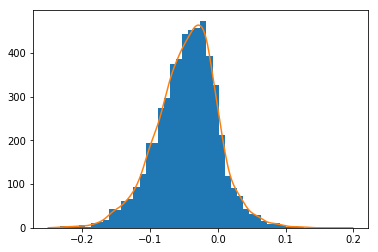

In [52]:
fitness = screen.results['fA'] + screen.results['fB'] + screen.results['pi_mean']
f = gaussian_kde(fitness)

counts, edges, _ = plt.hist(fitness, bins=40)
auc = np.sum(np.multiply(counts, [edges[ind + 1] - i for ind, i in enumerate(edges[:-1])]))

x = np.arange(-0.25, 0.2, 0.001)
y = f(x)*auc

plt.plot(x,y)

(array([   4.,    1.,    3.,    8.,   10.,   10.,   28.,   33.,   77.,
          92.,   99.,  122.,  220.,  268.,  337.,  455.,  472.,  616.,
         735.,  759.,  814.,  909.,  826.,  809.,  721.,  485.,  334.,
         235.,  174.,  112.,   69.,   45.,   35.,   33.,   17.,   11.,
           9.,    2.,    9.,    2.]),
 array([-0.237   , -0.227675, -0.21835 , -0.209025, -0.1997  , -0.190375,
        -0.18105 , -0.171725, -0.1624  , -0.153075, -0.14375 , -0.134425,
        -0.1251  , -0.115775, -0.10645 , -0.097125, -0.0878  , -0.078475,
        -0.06915 , -0.059825, -0.0505  , -0.041175, -0.03185 , -0.022525,
        -0.0132  , -0.003875,  0.00545 ,  0.014775,  0.0241  ,  0.033425,
         0.04275 ,  0.052075,  0.0614  ,  0.070725,  0.08005 ,  0.089375,
         0.0987  ,  0.108025,  0.11735 ,  0.126675,  0.136   ]),
 <a list of 40 Patch objects>)

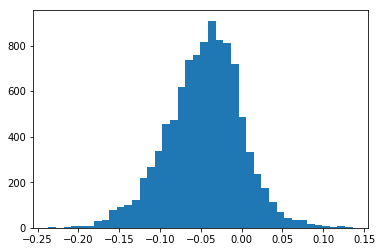

In [80]:
ps = f.pdf(x)/np.sum(f.pdf(x))
n = []
for _ in range(0, 10000): 
    n.append(np.random.choice(x, p=ps))
    
plt.hist(n, bins=40)

In [86]:
counts_full_df = pd.read_csv(counts_file, sep='\t')

In [91]:
counts_full_df.iloc[:, 5:].sum()

testing_T3_1      8283976.0
testing_T3_2     10689912.0
testing_T14_1     7654911.0
testing_T14_2     8665073.0
testing_T21_1     8381603.0
testing_T21_2     8464567.0
testing_T28_1    13267165.0
testing_T28_2    15837516.0
dtype: float64

In [94]:
fitness.head()

0   -0.027891
1    0.006316
2   -0.020637
3   -0.032892
4   -0.078481
dtype: float64

In [96]:
print(515*np.power(2, 11*-0.020637))
print(515*np.power(2, 18*-0.020637))
print(515*np.power(2, 25*-0.020637))

440.018881568
398.093256276
360.162364233


In [ ]:
515*np.power(2, 11*-0.020637)

# Changing the relative counts of A549

In [103]:
#abundance_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_abundance_thresholds.txt"
#counts_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_timepoint_counts.txt"

abundance_file = os.path.join(A549, 'A549_abundance_thresholds.txt')
counts_file = os.path.join(A549, 'A549_timepoint_counts.txt')

times = np.array([3,14,21,28])

# initialize screen object
#screen = dual_crispr_screen.Screen(counts_file, times)
screen = dual_crispr_screen.Screen(counts_full_df, times)

# set some parameters
# number of iterations to perform
screen.options.niter = 2
screen.options.null_target_id = '0'
screen.options.verbose = True

# perform construct fitness calculation
screen.run_construct_fitting()

# run bootstraps
screen.run_bootstrap()

# summarize results 
screen.summarize()

# view results 
screen.results.head()

UnboundLocalError: local variable 'tps' referenced before assignment

In [102]:
screen

Screen: None

In [93]:
counts_full_df.iloc[:, 5:]

,testing_T3_1,testing_T3_2,testing_T14_1,testing_T14_2,testing_T21_1,testing_T21_2,testing_T28_1,testing_T28_2
0,133.0,168.0,1.0,46.0,0.0,48.0,0.0,1.0
1,789.0,1046.0,786.0,779.0,1181.0,696.0,724.0,1179.0
2,515.0,709.0,404.0,442.0,193.0,424.0,205.0,442.0
3,520.0,549.0,326.0,1265.0,244.0,1341.0,135.0,3171.0
4,584.0,433.0,255.0,193.0,180.0,527.0,188.0,685.0
5,294.0,263.0,205.0,590.0,179.0,465.0,185.0,660.0
6,318.0,258.0,599.0,260.0,913.0,156.0,2538.0,393.0
7,213.0,301.0,385.0,245.0,199.0,376.0,268.0,315.0
8,129.0,201.0,88.0,139.0,130.0,40.0,168.0,134.0
9,164.0,156.0,319.0,404.0,75.0,125.0,110.0,196.0
